## Cleaning Data For Machine Learning

This tutorial is based upon the textbook:

Walker, M. (2022). Data Cleaning and Exploration with Machine Learning. Pakt Publishing Ltd..

In [64]:
#!pip install pyod

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler




In [66]:
nls97 = pd.read_csv("nls97.csv")
nls97.set_index("personid", inplace=True)

nls97.head()



,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,satverbal,satmath,gpaoverall,gpaenglish,gpamath,gpascience,highestdegree,govprovidejobs,govpricecontrols,weeksworked17
personid,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,NaN,NaN,306.0,350.0,280.0,315.0,2. High School,NaN,NaN,48.0
100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,...,NaN,NaN,NaN,NaN,NaN,NaN,2. High School,NaN,NaN,52.0
100284,Male,11,1984,7.0,Never-married,1.0,0.0,58000.0,NaN,11 to 20 hours a week,...,NaN,NaN,NaN,NaN,NaN,NaN,0. None,NaN,NaN,0.0
100292,Male,4,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,345.0,345.0,370.0,300.0,4. Bachelors,NaN,NaN,NaN
100583,Male,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,...,NaN,NaN,291.0,283.0,285.0,240.0,2. High School,NaN,NaN,52.0


### Exploring Categorical Features

Categorical features can be nominal or ordinal.

Nominal features (e.g., gender, country) have discrete values without inherent order or numerical meaning. Even if encoded as numbers, arithmetic operations on them are meaningless.

Ordinal features (e.g., Likert scale ratings) also have discrete values but with a meaningful order. However, the spacing between values is not consistent, so arithmetic is generally inappropriate.

Before modeling, it is useful to calculate the frequency of each categorical value (a one-way frequency distribution). In pandas, this can be easily done with the value_counts() method on DataFrame columns.

Let's find our categorical fatures:

In [67]:
nls97.dtypes


gender                    object
birthmonth                 int64
birthyear                  int64
highestgradecompleted    float64
maritalstatus             object
childathome              float64
childnotathome           float64
wageincome               float64
weeklyhrscomputer         object
weeklyhrstv               object
nightlyhrssleep          float64
satverbal                float64
satmath                  float64
gpaoverall               float64
gpaenglish               float64
gpamath                  float64
gpascience               float64
highestdegree             object
govprovidejobs            object
govpricecontrols          object
weeksworked17            float64
dtype: object

Question: is month categorical or continuos? It is shown as an integer type?

In [68]:
nls97.describe()

,birthmonth,birthyear,highestgradecompleted,childathome,childnotathome,wageincome,nightlyhrssleep,satverbal,satmath,gpaoverall,gpaenglish,gpamath,gpascience,weeksworked17
count,8984.000000,8984.000000,6663.000000,4791.000000,4791.000000,5091.000000,6706.000000,1406.000000,1407.000000,6004.000000,5798.000000,5766.000000,5684.000000,6670.000000
mean,6.555988,1982.010352,14.059883,1.859320,0.410144,49477.022196,6.637340,499.724040,500.590618,281.840773,272.628838,260.562955,264.422942,39.016642
std,3.469429,1.396870,4.507592,1.259053,0.947590,40677.696798,1.364404,112.166256,114.953309,61.635667,74.062200,74.651580,77.825813,19.465974
min,1.000000,1980.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14.000000,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1981.000000,12.000000,1.000000,0.000000,25000.000000,6.000000,430.000000,430.000000,243.000000,227.000000,213.000000,218.000000,37.000000
50%,7.000000,1982.000000,14.000000,2.000000,0.000000,40000.000000,7.000000,500.000000,500.000000,286.000000,284.000000,278.000000,280.000000,49.000000
75%,10.000000,1983.000000,16.000000,3.000000,0.000000,62000.000000,8.000000,570.000000,580.000000,326.000000,323.000000,310.000000,316.000000,52.000000
max,12.000000,1984.000000,95.000000,9.000000,12.000000,235884.000000,20.000000,800.000000,800.000000,417.000000,418.000000,423.000000,424.000000,52.000000


Let's take a look at Marital Status:

In [69]:
# show frequencies for marital status
nls97.maritalstatus.value_counts(dropna=False)





maritalstatus
Married          3066
Never-married    2766
NaN              2312
Divorced          663
Separated         154
Widowed            23
Name: count, dtype: int64

In pandas, columns that store text (object type) can take up a lot of memory if they only contain a small set of repeated values. For example, if a column stores countries, there are only a limited number of possible values. In this case, it’s better to convert the column to the category data type, which stores the data much more efficiently.

To do this, we first create a list of the column names that have object type (let’s call it catcols). Then, we loop through each of these columns and use the astype("category") method to convert them into the category type.

In [70]:
# sort
catcols = nls97.select_dtypes(include=["object"]).columns
for col in nls97[catcols].columns:
  nls97[col] = nls97[col].astype('category')

nls97.dtypes




gender                   category
birthmonth                  int64
birthyear                   int64
highestgradecompleted     float64
maritalstatus            category
childathome               float64
childnotathome            float64
wageincome                float64
weeklyhrscomputer        category
weeklyhrstv              category
nightlyhrssleep           float64
satverbal                 float64
satmath                   float64
gpaoverall                float64
gpaenglish                float64
gpamath                   float64
gpascience                float64
highestdegree            category
govprovidejobs           category
govpricecontrols         category
weeksworked17             float64
dtype: object

### Simple univariate outliers

An outlier is an observation with values (or combinations of values) that are so unusual they don’t help explain the relationships in the rest of the data. Outliers matter because models may “overfit” to them, producing poor estimates and weaker predictive power. Sometimes, simply removing a few outliers can completely change model results.

It’s important to note that extreme values and outliers are not always the same:

Some extreme values reflect real trends and are not problematic.

Some outliers are not extreme when seen alone, but are unusual once we consider multiple features together.

**The limitation of univariate analysis:**
If we only look at one variable at a time, we might wrongly flag values as outliers just because they sit far from the center of the distribution (e.g., high income values). These may be valid observations. Conversely, we may miss outliers that look normal in one feature but are unusual in combination (e.g., a middle-aged person with an income pattern typical of teenagers).

That’s why univariate methods like the interquartile range (IQR) rule (flagging values 1.5×IQR beyond Q1 or Q3) are just a first step. They should raise red flags for further investigation, not serve as the final word. True outlier detection requires considering multivariate relationships, which the following chapters explore.

**Remember** Start by checking for extreme values in one variable, but always follow up by examining how those observations relate to other features before deciding whether they are true outliers.

In [71]:

covidtotals = pd.read_csv("covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

keyvars = ['location','total_cases_mill','total_deaths_mill',
  'aged_65_older','diabetes_prevalence','gdp_per_capita']

covidkeys = covidtotals[keyvars]
covidkeys.head()






,location,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence,gdp_per_capita
iso_code,,,,,,
AFG,Afghanistan,3314.321,139.102,2.581,9.59,1803.987
ALB,Albania,46061.922,853.430,13.188,10.08,11803.431
DZA,Algeria,3261.770,86.338,6.211,6.73,13913.839
AND,Andorra,181466.382,1643.694,NaN,7.97,NaN
AGO,Angola,1201.566,28.144,2.405,3.94,5819.495


Let's take a look at total_cases_mill. We get the first and third quartile
values and calculate the interquartile range, 1.5*(thirdq-firstq). Then, we
calculate their thresholds to determine the high and low extreme values, which
are interquartilerange+thirdq and firstq-interquartilerange,
respectively (if you are familiar with boxplots, you will notice that this is the same
calculation that's used for the whiskers of a boxplot; we will cover boxplots in the
next section):

In [72]:
# show outliers for total cases
thirdq, firstq = covidkeys.total_cases_mill.quantile(0.75), covidkeys.total_cases_mill.quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")




-91002.564625 <--> 158336.930375


Let's see the cases:

In [73]:
covidtotals.loc[covidtotals.total_cases_mill>extvalhigh].T


iso_code,AND,MNE,SYC
lastdate,2021-07-07,2021-07-07,2021-07-07
location,Andorra,Montenegro,Seychelles
total_cases,14021.0,100392.0,16304.0
total_deaths,127.0,1619.0,71.0
total_cases_mill,181466.382,159844.092,165792.15
total_deaths_mill,1643.694,2577.771,721.985
population,77265.0,628062.0,98340.0
population_density,163.755,46.28,208.354
median_age,NaN,39.1,36.2
gdp_per_capita,NaN,16409.288,26382.287


The main difference between these three countries and others is that they have very low
populations. Surprisingly, each has a much lower population density than average. That is
the opposite of what you would expect and merits further consideration. **Are these truly outliers? or do they make sense? It's important**

In practice, then, we think about extreme values or outliers relative to the distribution of
the feature. Quantile-quantile (Q-Q) plots can improve our sense of that distribution by
allowing us to view it graphically relative to a theoretical distribution: normal, uniform,
log, or others. Let's take a look:

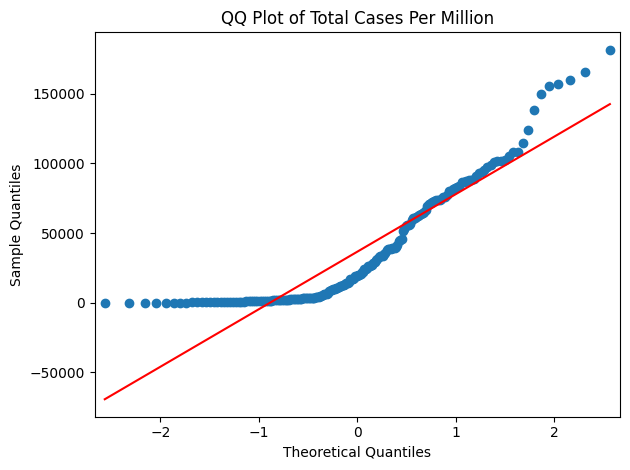

In [74]:
# show a qqplot for total cases and total cases per million
sm.qqplot(covidtotals[['total_cases_mill']]. \
  sort_values(['total_cases_mill']).dropna(), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.tight_layout()
plt.show()

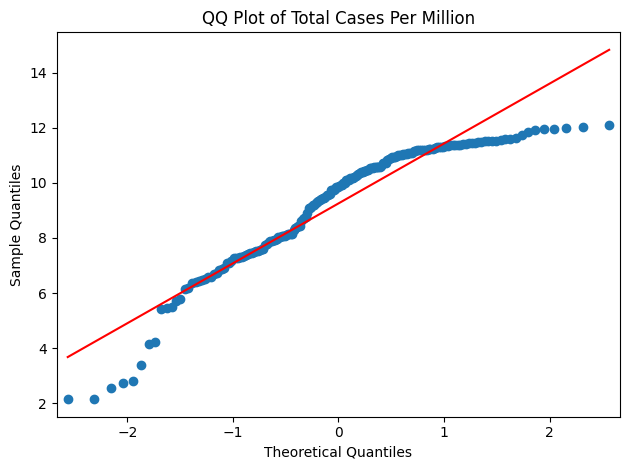

In [75]:
# show a qqplot for total cases and total cases per million
sm.qqplot(np.log(covidtotals[['total_cases_mill']]. \
  sort_values(['total_cases_mill']).dropna()), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.tight_layout()
plt.show()

### boxplots

A boxplot is a visual tool that summarizes how data is spread out. It highlights the interquartile range (IQR) — the middle 50% of the data — and marks the median (the middle value).

The whiskers extend from the IQR up to 1.5×IQR above the third quartile and 1.5×IQR below the first quartile.

Any points beyond the whiskers are flagged as extreme values (potential outliers).

In the example, circles above the upper whisker show extreme values of total COVID-19 cases per million people.

Looking closer at the IQR can reveal the shape of the distribution. In this case, the median lies toward the lower end of the IQR, which suggests a positively skewed distribution (most values are low, but a few very high values pull the distribution to the right).

**Boxplots are powerful because they show both spread (IQR) and skewness, while also highlighting potential outliers.**

C:\Users\nunor\AppData\Local\Temp\ipykernel_35484\875989228.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(covidtotals.total_cases_mill.dropna(),


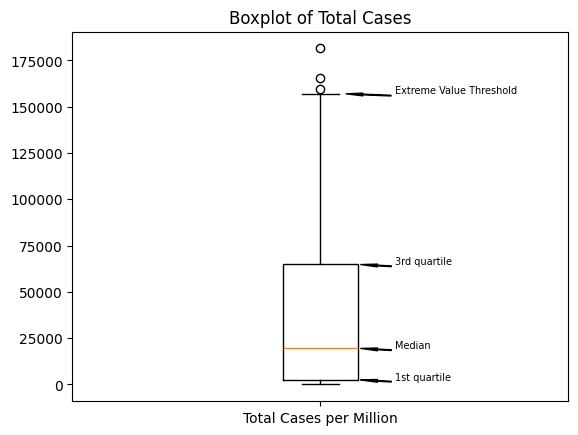

In [76]:
plt.boxplot(covidtotals.total_cases_mill.dropna(),
labels=['Total Cases per Million'])
plt.annotate('Extreme Value Threshold', xy=(1.05,157000), xytext=(1.15,157000), size=7,
arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,64800), xytext=(1.15,64800), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('Median', xy=(1.08,19500), xytext=(1.15,19500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,2500), xytext=(1.15,2500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of Total Cases")
plt.show()

Violin plots combine histograms and boxplots into one plot. They show the IQR, median,
and whiskers, as well as the frequency of the observations at all the value ranges.

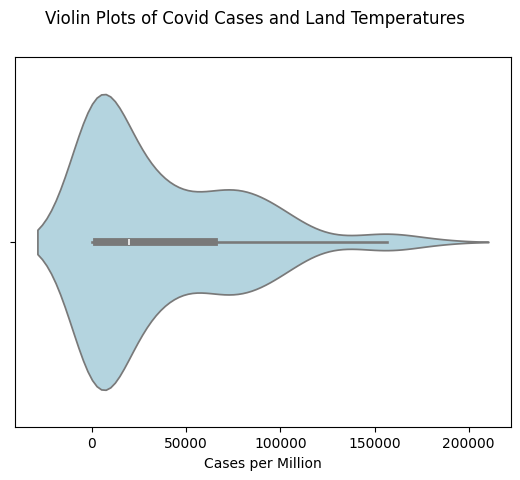

In [77]:
fig = plt.figure()
fig.suptitle("Violin Plots of Covid Cases and Land Temperatures")
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel("Cases per Million")
sns.violinplot(data=covidtotals.total_cases_mill, color="lightblue", orient="h")
ax1.set_yticklabels([])
plt.show()



### Exploring relationships between our features and target

When exploring data, we often look at how features (inputs) relate to the target variable (output).
This is called bivariate analysis (looking at two variables together). Tools like crosstabs, correlations, scatter plots, and grouped boxplots help us spot important patterns. For example, we might notice:

Strong correlations between features (risk of multicollinearity).

Non-linear relationships with the target (suggesting we may need transformations).

We also use multivariate analysis (looking at several features together) to better understand relationships and detect problematic data points. Some machine learning methods can help flag outliers or unusual observations, which may need to be transformed or removed.

#### Identifying outliers and extreme values in bivariate relationships

When building reliable models, it’s important to understand bivariate relationships — how two variables relate to each other. This includes not only how features relate to the target but also how features move together. If two features are highly correlated, it becomes difficult (and sometimes unnecessary) to model their independent effects.

Bivariate analysis is also critical for detecting outliers. A value might look normal on its own (not extreme in univariate terms) but become unusual when paired with another variable. For example:

* Imagine bird sightings at two sites. Site A averages 33 sightings per day, Site B averages 52, and the overall average is 42.

* A value of 58 sightings could be considered an outlier at Site A (well above its average) but completely normal at Site B.

This hints at a useful rule of thumb: whenever a feature of interest is correlated with another feature, we should take that relationship into account when we're trying to identify outliers (or any modeling with that feature, actually).

Outliers and unusual patterns often only become visible when we look at relationships between variables. That’s why examining bivariate (and later, multivariate) relationships is crucial for both feature selection and data cleaning.

A great place to start with our examination of bivariate relationships is with correlations. First, let's create a DataFrame that contains a few key features:

In [78]:
# set up the cumulative and demographic columns
covidtotals.info()

totvars = ['location','total_cases_mill','total_deaths_mill']
demovars = ['population_density','aged_65_older',
   'gdp_per_capita','life_expectancy','diabetes_prevalence']

covidkeys = covidtotals.loc[:, totvars + demovars]

# generate a correlation matrix of the cumulative and demographic data
corrmatrix = covidkeys.corr(method="pearson", numeric_only=True)
corrmatrix



<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, AFG to ZWE
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lastdate             221 non-null    object 
 1   location             221 non-null    object 
 2   total_cases          192 non-null    float64
 3   total_deaths         185 non-null    float64
 4   total_cases_mill     192 non-null    float64
 5   total_deaths_mill    185 non-null    float64
 6   population           221 non-null    float64
 7   population_density   206 non-null    float64
 8   median_age           190 non-null    float64
 9   gdp_per_capita       193 non-null    float64
 10  aged_65_older        188 non-null    float64
 11  total_tests_thous    13 non-null     float64
 12  life_expectancy      217 non-null    float64
 13  hospital_beds_thous  170 non-null    float64
 14  diabetes_prevalence  200 non-null    float64
 15  region               221 non-null    object

,total_cases_mill,total_deaths_mill,population_density,aged_65_older,gdp_per_capita,life_expectancy,diabetes_prevalence
total_cases_mill,1.000000,0.709783,0.043152,0.533905,0.464955,0.570582,0.023023
total_deaths_mill,0.709783,1.000000,-0.033728,0.530196,0.222839,0.459677,-0.009011
population_density,0.043152,-0.033728,1.000000,0.063253,0.408957,0.231153,0.012559
aged_65_older,0.533905,0.530196,0.063253,1.000000,0.492855,0.729937,-0.063584
gdp_per_capita,0.464955,0.222839,0.408957,0.492855,1.000000,0.681222,0.123718
life_expectancy,0.570582,0.459677,0.231153,0.729937,0.681222,1.000000,0.190043
diabetes_prevalence,0.023023,-0.009011,0.012559,-0.063584,0.123718,0.190043,1.000000


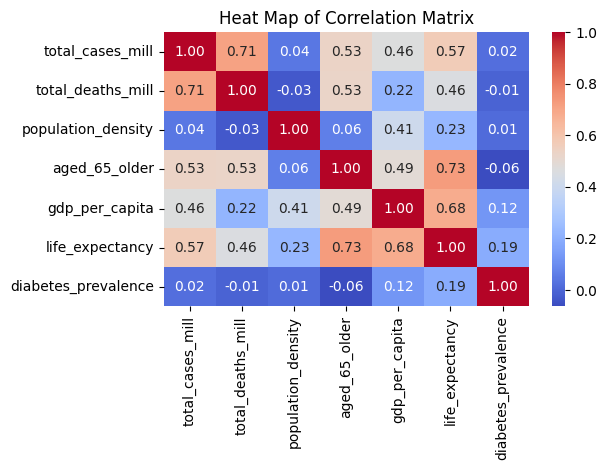

In [79]:
sns.heatmap(corrmatrix, xticklabels=corrmatrix.columns,
  yticklabels=corrmatrix.columns, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()



We can use the crosstab function to view the number of countries for each
quintile of cases and quintile of deaths. As we would expect, most of the countries
are along the diagonal. There are 27 countries with very low cases and very low
deaths, and 25 countries with very high cases and very high deaths. The interesting
counts are those not on the diagonal, such as the four countries with very high cases
but only medium deaths, nor the one with medium cases and very high deaths. Let's
also look at the means of our features so that we can reference them later:

In [80]:
# see if some countries have unexpected low or high death rates given number of cases
covidkeys['total_cases_q'] = \
  pd.qcut(covidkeys['total_cases_mill'],
  labels=['very low','low','medium','high','very high'],
  q=5, precision=0)

covidkeys['total_deaths_q'] = \
  pd.qcut(covidkeys['total_deaths_mill'],
  labels=['very low','low','medium','high','very high'],
  q=5, precision=0)



In [81]:
pd.crosstab(covidkeys.total_cases_q, covidkeys.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,27,7,0,0,0
low,9,24,4,0,0
medium,1,6,23,6,1
high,0,0,6,21,11
very high,0,0,4,10,25


Let's take a closer look at the countries away from the diagonal. Four countries –
Cyprus, Kuwait, Maldives, and Qatar – have fewer deaths per million than average
but well above average cases per million. Interestingly, all four countries are very
small in terms of population; three of the four have population densities far below
the average of 453; again, three of the four have people aged 65 or older percentages
that are much lower than average:

In [82]:
covidtotals.loc[(covidkeys.total_cases_q=="very high")
& (covidkeys.total_deaths_q=="medium")].T

iso_code,CYP,KWT,MDV,QAT
lastdate,2021-07-07,2021-07-07,2021-07-07,2021-07-07
location,Cyprus,Kuwait,Maldives,Qatar
total_cases,80588.0,369227.0,74724.0,222918.0
total_deaths,380.0,2059.0,213.0,596.0
total_cases_mill,90751.741,86458.624,138239.027,77373.606
total_deaths_mill,427.926,482.138,394.049,206.868
population,888005.0,4270563.0,540542.0,2881060.0
population_density,127.657,232.128,1454.433,227.322
median_age,37.3,33.7,30.6,31.9
gdp_per_capita,32415.132,65530.537,15183.616,116935.6


Let's take a closer look at the country with more deaths than we would have
expected based on cases. For Mexico, the number of cases per million are well below
average, while the number of deaths per million are quite a bit above average

In [83]:
covidtotals.loc[(covidkeys. total_cases_q=="medium")
& (covidkeys.total_deaths_q=="very high")].T

iso_code,MEX
lastdate,2021-07-07
location,Mexico
total_cases,2558369.0
total_deaths,234192.0
total_cases_mill,19842.662
total_deaths_mill,1816.389
population,128932753.0
population_density,66.444
median_age,29.3
gdp_per_capita,17336.469


Correlation coefficients and heat maps are a good place to start when we want to get a
sense of the bivariate relationships in our dataset. However, it can be hard to visualize
the relationship between continuous variables with just a correlation coefficient. This is
particularly true when the relationship is not linear – that is, when it varies based on the
ranges of a feature. We can often improve our understanding of the relationship between
two features with a scatter plot.

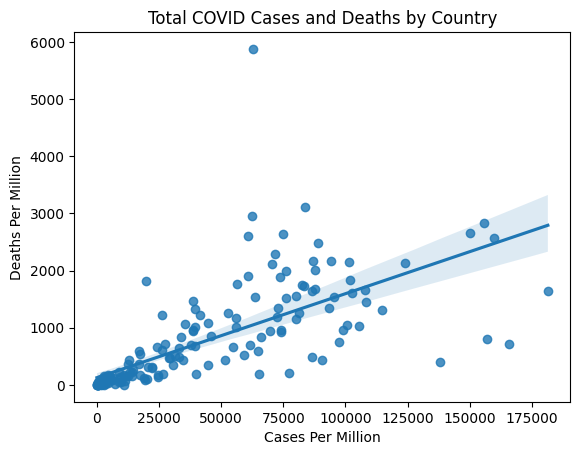

In [84]:
ax = sns.regplot(x="total_cases_mill", y="total_deaths_mill", data=covidtotals)
ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total COVID Cases and Deaths by Country")
plt.show()

The country with deaths per million near 6,000 and cases per million below 75,000
is clearly an outlier. Let's take a closer look

In [85]:
covidtotals.loc[(covidtotals.total_cases_mill<75000) & (covidtotals.total_deaths_mill>5500)].T

iso_code,PER
lastdate,2021-07-07
location,Peru
total_cases,2071637.0
total_deaths,193743.0
total_cases_mill,62830.483
total_deaths_mill,5876.013
population,32971846.0
population_density,25.129
median_age,29.1
gdp_per_capita,12236.706


Creating scatter plots that contain most of the key continuous features can help us
identify other possible outliers and better visualize the correlations we observed in
the first section of this chapter. Let's create scatter plots of people who are aged 65
and older and GDP per capita with total cases per million:

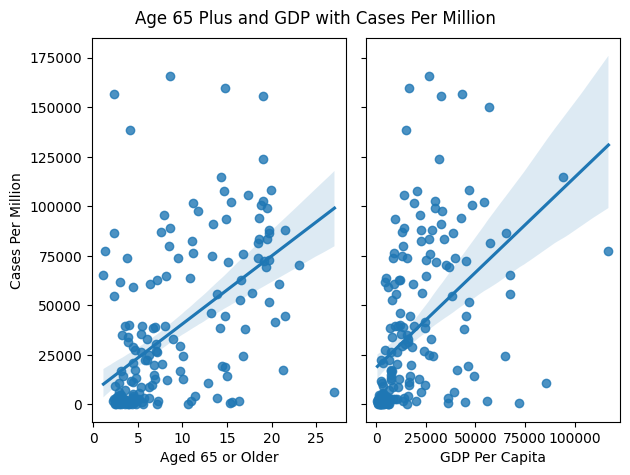

In [86]:
fig, axes = plt.subplots(1,2, sharey=True)
sns.regplot(x=covidtotals.aged_65_older, y=covidtotals.total_cases_mill, ax=axes[0])
sns.regplot(x=covidtotals.gdp_per_capita, y=covidtotals.total_cases_mill, ax=axes[1])
axes[0].set_xlabel("Aged 65 or Older")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Age 65 Plus and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

Seaborn has a nice function for this:

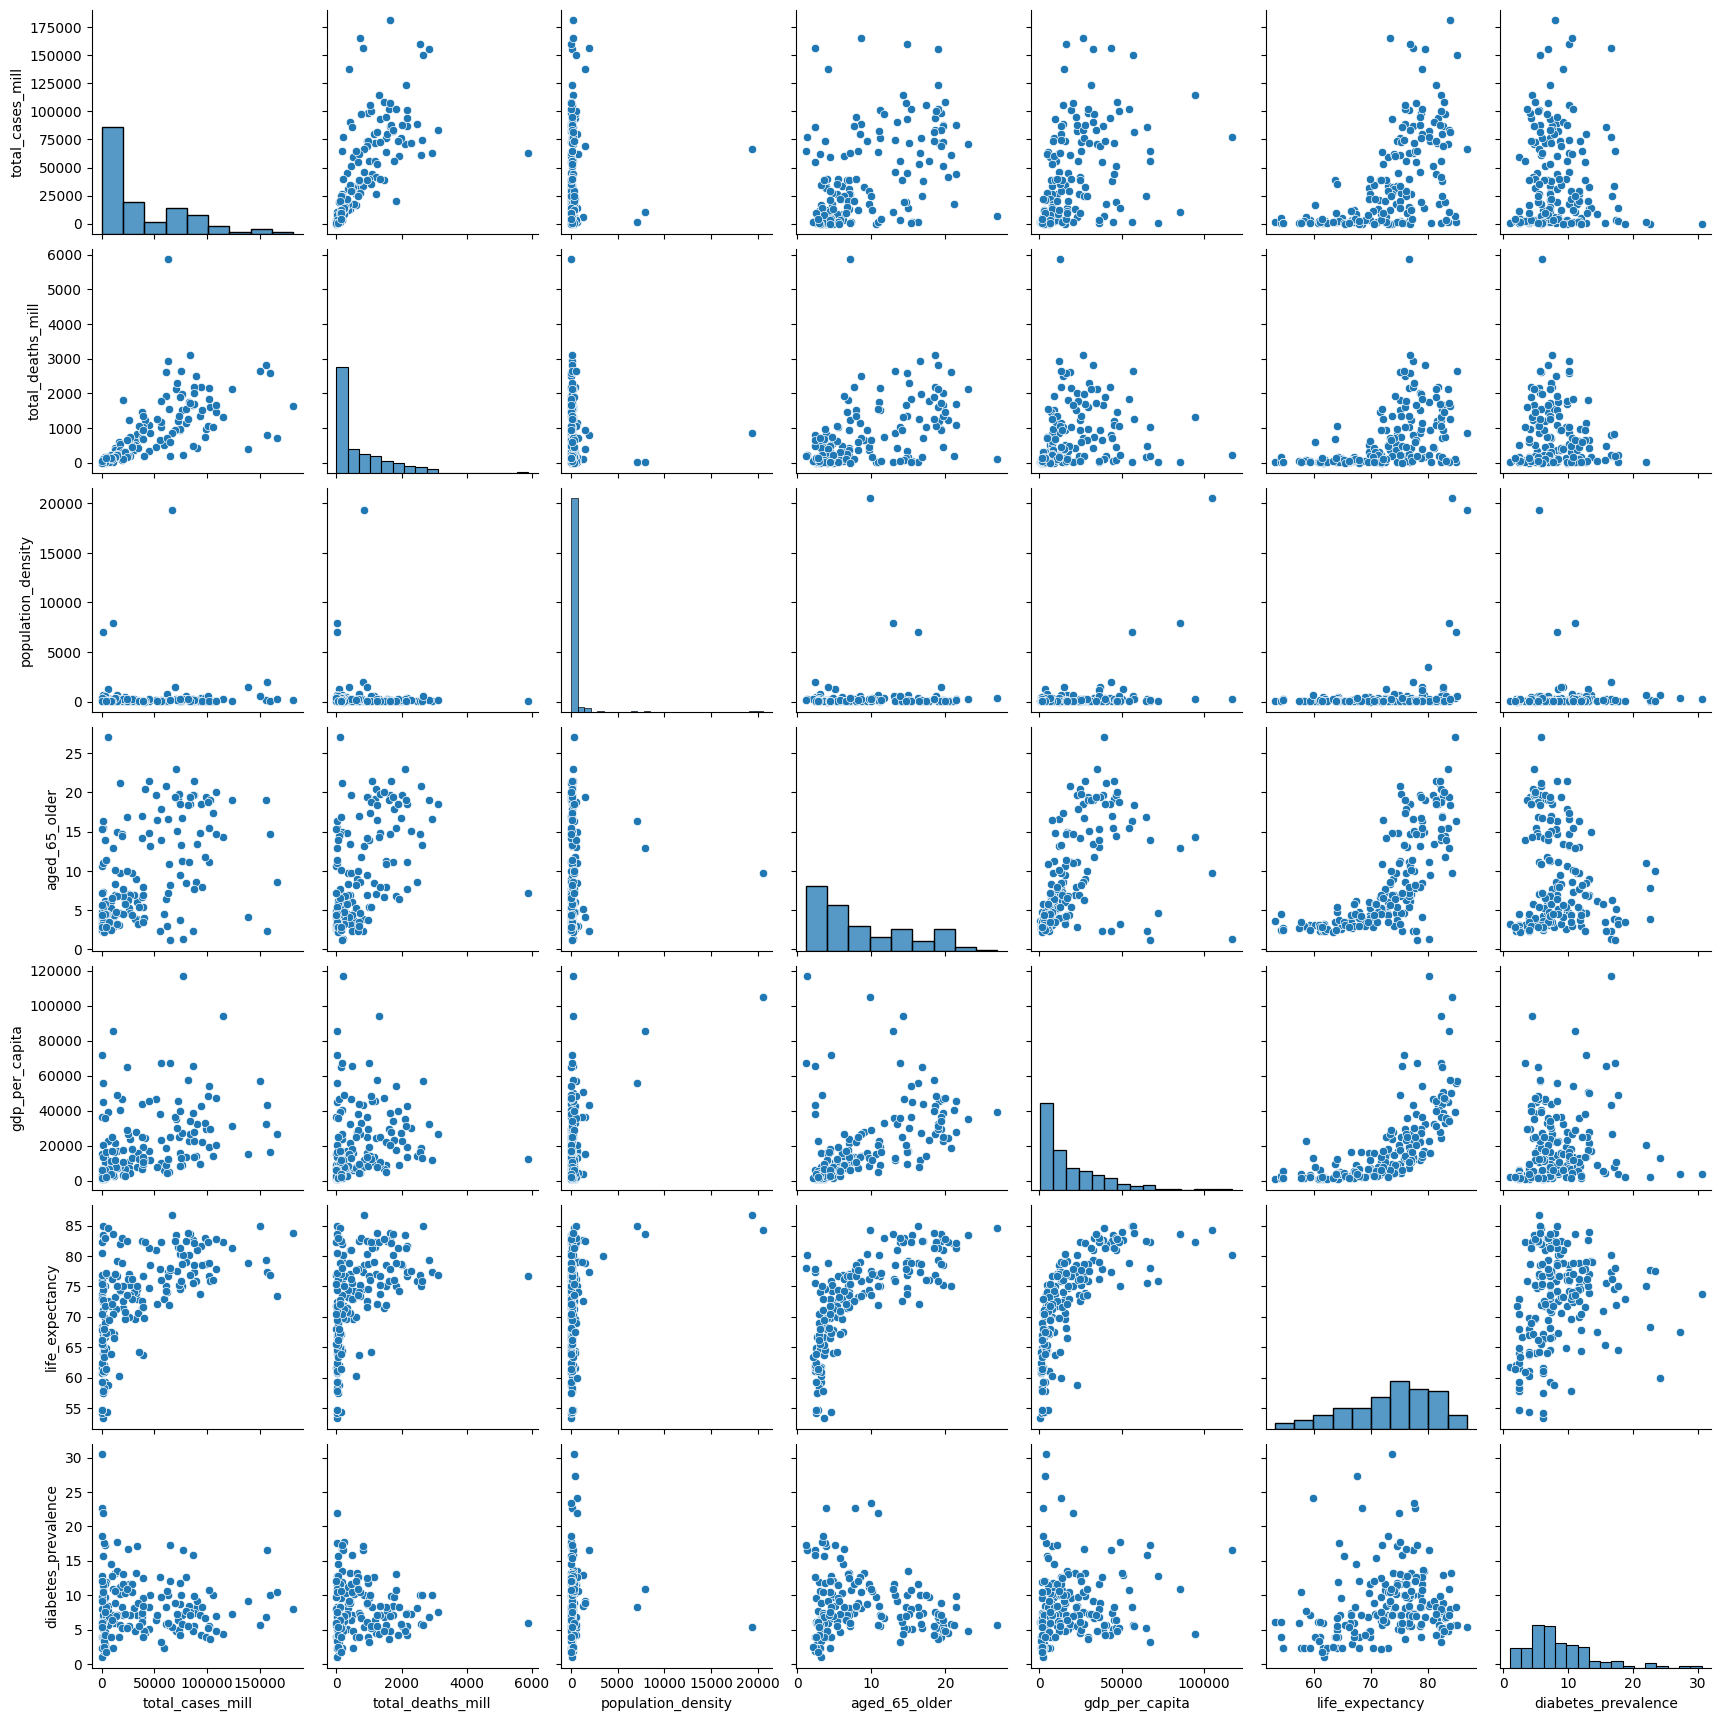

In [87]:
sns.pairplot(data=covidkeys)

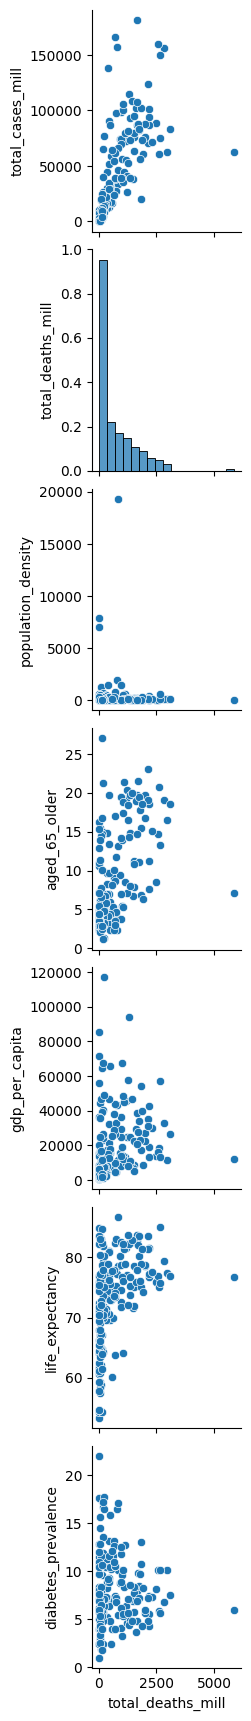

In [88]:
sns.pairplot(data=covidkeys, x_vars=["total_deaths_mill"])

### What to do with outliers:

Some outliers reflect genuine, rare events in the population. For example, an unusually high transaction amount may represent a real but rare purchase. In such cases, these data points carry important information about the tails of the distribution and may even be of special interest (e.g., fraud detection, rare disease studies).

Are They Errors? Other outliers may stem from data quality issues: typos, sensor malfunctions, missing values coded incorrectly, or misaligned data joins. These do not reflect the underlying reality and can distort analysis. For instance, if a country’s population was accidentally recorded as 1,000 instead of 10,000,000, the resulting per capita metrics would be meaningless.

**Should We Remove Them?** Whether to remove outliers depends on:

* Context: If the point is an error, it should be corrected or removed.

* Research objective: If the goal is to model “typical” behavior, extreme cases may be excluded. If the goal is to capture rare but important events (e.g., credit defaults, equipment failures), outliers are critical.

* Influence on models: Outliers can have a disproportionate effect, especially on linear models where they can skew coefficients.

## Grouped boxplots

Grouped boxplots are a useful, often overlooked way to compare how a continuous variable’s distribution changes across categories. Using the NLS dataset (one row per respondent, with yearly education/employment stored in separate columns) illustrates how grouped boxplots reveal differences across categorical values over time.

C:\Users\nunor\AppData\Local\Temp\ipykernel_35484\3023662453.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')


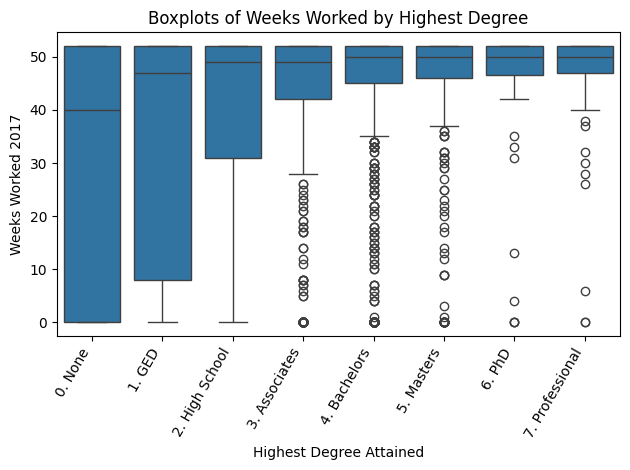

In [89]:
# do boxplots for weeks worked by highest degree earned
myplt = sns.boxplot(x='highestdegree',y='weeksworked17', data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()


We can also use grouped boxplots to illustrate how the distribution of COVID-19
cases varies by region. Let's also add a swarmplot to view the data points since there
aren't too many of them:

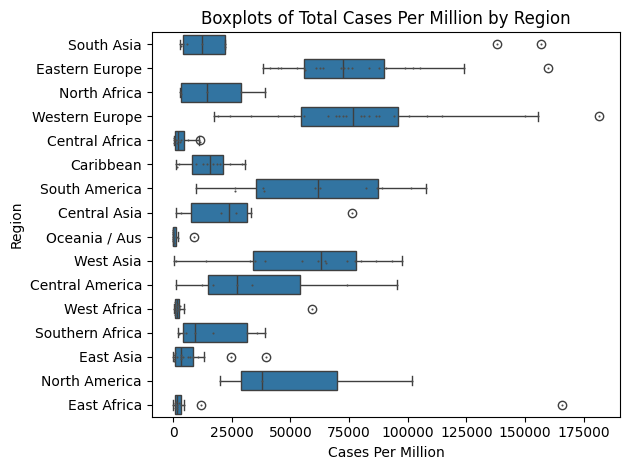

In [90]:
# do boxplots for cases per million by region
sns.boxplot(x='total_cases_mill', y='region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_mill", data=covidtotals, size=1.5, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

These grouped boxplots show just how much the median cases per million varies by
region, from East Africa and East Asia on the low end to Eastern Europe and Western
Europe on the high end. Extremely high values for East Asia are below the first quartile for
Western Europe. We should probably avoid drawing too many conclusions beyond that
since the counts for most regions (the number of countries) are fairly small.

### Influence for outliers

Influence and univariate outliers are related but distinct concepts in regression analysis, each with different implications for model building and interpretation.

The importance of influence lies in understanding how much a single observation can alter model estimates and predictions. Some data points can disproportionately affect regression coefficients, standard errors, and fitted values. These influential points can either be informative—highlighting important patterns—or problematic—distorting relationships if they come from a fundamentally different process. Cook’s Distance is a standard diagnostic to assess influence, measuring how much predictions would change if a given observation were excluded. If an observation has high influence but does not reflect the same underlying process as the majority of the data, as in the case of monarch butterflies in a dataset of migrating birds, it may be reasonable to remove it to avoid misleading results.

By contrast, univariate outliers are observations with unusually extreme values in one or more features. However, not all extreme values are outliers. Some may represent natural variability and still follow the same trend as the rest of the data, making them valid and useful. Outliers are instead defined as values or combinations of values so atypical that they fail to explain or be explained by broader patterns. They signal potential errors, anomalies, or qualitatively different processes but are not always influential in a statistical sense.

The distinction matters because outliers and influence do not always overlap. An outlier may not exert much influence if it has little leverage in the regression, while an influential point might not look extreme in any single dimension but still shifts results significantly. Outlier detection ensures the data reflects the intended phenomenon, while influence diagnostics ensure the model is not overly driven by a handful of observations. In practice, analysts need to examine both dimensions together: outliers for irregularity in the data, and influence for their impact on the model.

In [91]:
# fit a linear regression model
# return the influence of each observation
# also return model coefficients
def getlm(df, ycolname, xcolnames):
  df = df[[ycolname] + xcolnames].dropna()
  y = df[ycolname]
  X = df[xcolnames]
  X = sm.add_constant(X)
  lm = sm.OLS(y, X).fit()
  influence = lm.get_influence().summary_frame()
  coefficients = pd.DataFrame(zip(['constant'] + xcolnames,
    lm.params, round(lm.pvalues,2)), columns=['features','params',
    'pvalues'])
  return coefficients, influence, lm

xvars = ['population_density','aged_65_older',
'gdp_per_capita','diabetes_prevalence']
coefficients, influence, lm = getlm(covidtotals, 'total_cases_mill', xvars)
coefficients



,features,params,pvalues
0,constant,-1076.471086,0.87
1,population_density,-6.906239,0.03
2,aged_65_older,2713.918090,0.00
3,gdp_per_capita,0.531511,0.00
4,diabetes_prevalence,736.809032,0.24


We can use the influence DataFrame that we created in our call to getlm to take a
closer look at those observations with a high Cook's D. One way of defining a high
Cook's D is by using three times the mean value for Cook's D for all observations.
Let's create a covidtotalsoutliers DataFrame with all the values above
that threshold.



In [92]:
# identify countries with an outsized influence on the model
influencethreshold = 3*influence.cooks_d.mean()
covidtotals = covidtotals.join(influence[['cooks_d']])
covidtotalsoutliers = \
  covidtotals.loc[covidtotals.cooks_d>influencethreshold]
covidtotalsoutliers.shape



(13, 17)

There were 13 countries with Cook's D values above the threshold. Let's print out
the first five in descending order of the Cook's D value. Bahrain and Maldives are in
the top quarter of the distribution for cases (see the descriptives we printed earlier
in this section). They also have high population densities and low percentages of
age 65 or older. All else being equal, we would expect lower cases per million for
those two countries, given what our model says about the relationship between
population density and age to cases. Bahrain does have a very high GDP per capita,
however, which our model tells us is associated with high case numbers.



In [62]:
covidtotalsoutliers[['location','total_cases_mill','cooks_d'] +   xvars].sort_values(['cooks_d'], ascending=False).head()



,location,total_cases_mill,cooks_d,population_density,aged_65_older,gdp_per_capita,diabetes_prevalence
iso_code,,,,,,,
BHR,Bahrain,156793.409,0.229818,1935.907,2.372,43290.705,16.52
SGP,Singapore,10709.116,0.199708,7915.731,12.922,85535.383,10.99
HKG,Hong Kong,1593.307,0.181348,7039.714,16.303,56054.920,8.33
JPN,Japan,6420.871,0.095461,347.778,27.049,39002.223,5.72
MDV,Maldives,138239.027,0.069122,1454.433,4.120,15183.616,9.19


Singapore and Hong Kong have extremely high population densities and belowaverage cases per million, particularly Hong Kong. These two locations, alone, may
account for the direction of the population density coefficient. They both also have
very high GDP per capita values, which might be a drag on that coefficient. It may
just be that our model should not include locations that are city-states.

let's take a look at our regression model estimates if we remove Hong Kong
and Singapore

In [93]:
coefficients, influence, lm2 = \
  getlm(covidtotals.drop(['HKG','SGP']),
  'total_cases_mill', xvars)
coefficients


,features,params,pvalues
0,constant,-2864.218996,0.65
1,population_density,26.988755,0.01
2,aged_65_older,2669.281431,0.00
3,gdp_per_capita,0.553073,0.00
4,diabetes_prevalence,319.261869,0.60


The big change in the model is that the population density coefficient has now changed
direction. This demonstrates how sensitive the population density estimate is to outlier
observations whose feature and target values may not be generalizable to the rest of the
data. In this case, that might be true for city-states such as Hong Kong and Singapore.

Generating influence measures with linear regression is a very useful technique, and it
has the advantage that it is fairly easy to interpret, as we have seen. However, it does have
one important disadvantage: it assumes a linear relationship between features, and that
features are normally distributed. This is often not the case. We also needed to understand
the relationships in the data enough to create labels, to identify total cases per million as
the target. This is not always possible either. In the next two sections, we'll look at machine
learning algorithms for outlier detection that do not make these assumptions.

### Using K-nearest neighbors to find outliers

Machine learning can help detect unusual observations in datasets without a target variable. This is especially useful when working with unlabeled data, as it allows us to identify outliers without assuming any specific feature relationships or distributions.

Although the K-nearest neighbors (KNN) algorithm is most often applied to classification or regression tasks with labeled data, it can also be adapted for anomaly detection. In this context, KNN highlights observations that differ the most from their nearest neighbors, marking them as potential anomalies. Its main strengths are its intuitive nature, flexibility, and minimal assumptions about data structure. However, a key limitation is efficiency—KNN can be computationally expensive compared to parametric approaches like linear regression.

In short, KNN provides a straightforward, assumption-light method for spotting anomalies in unlabeled datasets, though it may not be the most efficient choice for large-scale applications.

We will use PyOD, short for Python outlier detection, to identify countries in the
COVID-19 data that are significantly different from others. PyOD can use several
algorithms to identify outliers, including KNN.

In [97]:
# create a standardized dataset of the analysis variables

standardizer = StandardScaler().set_output(transform="pandas")
analysisvars = ['location','total_cases_mill','total_deaths_mill',
  'population_density','diabetes_prevalence','aged_65_older',
  'gdp_per_capita']
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])





Now, we can run the model and generate predictions and anomaly scores. First, we
must set contamination to 0.1 to indicate that we want 10% of observations to
be identified as outliers. This is pretty arbitrary but not a bad starting point. After
using the fit method to run the KNN algorithm, we get predictions (1 if an outlier,
0 if an inlier) and an anomaly score, which is the basis of the prediction (in this
case, the top 10% of anomaly scores will get a prediction of 1):

In [98]:
# run the KNN model and generate anomaly scores
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)
y_pred = clf.labels_
y_scores = clf.decision_scores_

# show the predictions from the model
pred = pd.DataFrame(zip(y_pred, y_scores),
  columns=['outlier','scores'],
  index=covidanalysis.index)

pred

,outlier,scores
iso_code,,
AFG,0,0.661718
ALB,0,1.153919
DZA,0,0.537596
AGO,0,0.323135
ATG,0,0.928178
...,...,...
VEN,0,0.598702
VNM,0,0.622745
YEM,0,0.220778


In [99]:
pred.describe()

,outlier,scores
count,174.000000,174.000000
mean,0.103448,1.056596
std,0.305422,1.081570
min,0.000000,0.106464
25%,0.000000,0.485624
50%,0.000000,0.925962
75%,0.000000,1.238594
max,1.000000,9.342221


In [100]:
# show covid data for the outliers
covidanalysis = covidanalysis.join(pred).\
  loc[:,analysisvars + ['scores']].\
  sort_values(['scores'], ascending=False)
covidanalysis.head(10)


,location,total_cases_mill,total_deaths_mill,population_density,diabetes_prevalence,aged_65_older,gdp_per_capita,scores
iso_code,,,,,,,,
SGP,Singapore,10709.116,6.153,7915.731,10.99,12.922,85535.383,9.342221
HKG,Hong Kong,1593.307,28.278,7039.714,8.33,16.303,56054.920,8.030011
PER,Peru,62830.483,5876.013,25.129,5.95,7.151,12236.706,4.369439
QAT,Qatar,77373.606,206.868,227.322,16.52,1.307,116935.600,4.231571
BHR,Bahrain,156793.409,803.370,1935.907,16.52,2.372,43290.705,3.506293
LUX,Luxembourg,114617.813,1308.357,231.447,4.42,14.312,94277.965,2.731084
BRN,Brunei,608.024,6.857,81.347,12.79,4.591,71809.251,2.600536
KWT,Kuwait,86458.624,482.138,232.128,15.84,2.345,65530.537,2.524814
MDV,Maldives,138239.027,394.049,1454.433,9.19,4.120,15183.616,2.505148


Several of the locations we identified as having high influence in the previous
section have high anomaly scores, including Singapore, Hong Kong, Bahrain, and
Maldives. This is more evidence that we need to take a closer look at the data for
these countries. Perhaps there is invalid data or there are theoretical reasons why
they are very different than the rest of the data.

Unlike the linear model in the previous section, there is no defined target. We
include both total cases per million and total deaths per million in this case. Peru
has been identified as an outlier here, though it was not with the linear model. This
is partly because of Peru's very high deaths per million, which is the highest in the
dataset (we did not use deaths per million in our linear regression model).

#### Want to go further:

* Isolations forests are another advanced machine learning approach, similar to KNN, for outlier detection.

* Imputation can be an alternative to removal

### A final note --  before or after training test split:

When deciding whether to perform outlier detection and removal before or after a train–test split, the central issue is how to balance data cleanliness with the need to avoid data leakage.
* If you remove outliers before splitting, the resulting dataset looks more homogeneous and both train and test sets benefit from this cleaning. However, this approach is problematic because the criteria for identifying outliers are derived from the entire dataset. That means the test set, which should remain unseen until final evaluation, has indirectly influenced the way the model is prepared. This leakage can lead to overly optimistic performance estimates because the test data no longer reflects truly independent observations.

* In contrast, performing outlier detection after splitting ensures that only the training data is used to determine what counts as an outlier. The training set can then be cleaned, and the same detection logic—whether based on thresholds, distance measures, or model-based anomaly detection—can be consistently applied to the test set. The test data itself remains untouched when fitting these rules, preserving its role as an unbiased stand-in for future, unseen data. While this can lead to the test set containing anomalies that the model never encountered during training, this is actually beneficial. It gives a more realistic estimate of how the model will perform when faced with unexpected cases in deployment.

The general best practice, therefore, is to split the data first and then perform outlier detection and removal on the training set only. Any fitted parameters or rules from the training process can be applied to the test set, but the test data itself should never be used to guide the cleaning process. This respects the principle of preventing data leakage and ensures that evaluation results reflect performance in real-world scenarios where anomalies can and do occur.